In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
def process_data(file,analysis_type):
    if analysis_type=="linear":
        df=pd.read_csv(file,delimiter="\t")
        df["P"]=df["P"].astype(float)
        df['minuslog10pvalue'] = -np.log10(df["P"])
        df["#CHROM"]=df["#CHROM"].replace("X",23)
        df["#CHROM"]=pd.to_numeric(df["#CHROM"])
        df["#CHROM"] = df["#CHROM"].astype('category')
        df = df.sort_values('#CHROM')
        df['ind'] = range(len(df))
        return df
    if analysis_type=="logistic":
        df=pd.read_csv(file,delimiter="\t")
        df['minuslog10pvalue'] = -np.log10(df["P"])
        df["#CHROM"]=df["#CHROM"].replace("X",23)
        df["#CHROM"]=pd.to_numeric(df["#CHROM"])
        df["#CHROM"] = df["#CHROM"].astype('category')
        df = df.sort_values('#CHROM')
        df['ind'] = range(len(df))
        return df

In [9]:
def plot_manhattan_annotate(processed_data,title,color_list,files_known_snps,colors_known_snps):
    '''
    Input: dataframe with P values
    Output: Manhattan plot
    '''
    df=processed_data
    df_grouped = df.groupby(('#CHROM'))
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    colors = color_list
    x_labels = []
    x_labels_pos = []
    for num, (name, group) in enumerate(df_grouped):
        group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)],ax=ax,rasterized=True)
        x_labels.append(name)
        x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
    
    df["snp"]=df["SNP"].str.rsplit(":",n=2).str[0]
    
    for num,file in enumerate(files_known_snps):
        snps=pd.read_csv(file,header=None)
        snps=snps[0].tolist()
        df_label=df[df["snp"].isin(snps)]
        print(df_label.shape)
        for i,row in df_label.iterrows():
            ax.scatter(row["ind"],row["minuslog10pvalue"],color=colors_known_snps[num],rasterized=True)
            
    ax.axhline(y=7.30, color='r', linestyle='-')
    ax.set_xticks(x_labels_pos)
    ax.set_xticklabels(x_labels)
    ax.set_xlim([0, len(df)])
    ax.set_xlabel('Chromosome')
    ax.set_ylabel('-log10 P value')
    ax.set_title(title+' GWAS Manhattan plot')
    fig.savefig(title+'.manhattan.labeled.pdf')
    #plt.close()

In [5]:
df=process_data("../data/plink-associations/all/african.cohort.GWAS.ADD","logistic")

/cellar/users/mpagadal/Programs/miniconda3/envs/baseold/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


(155, 17)
(29, 17)


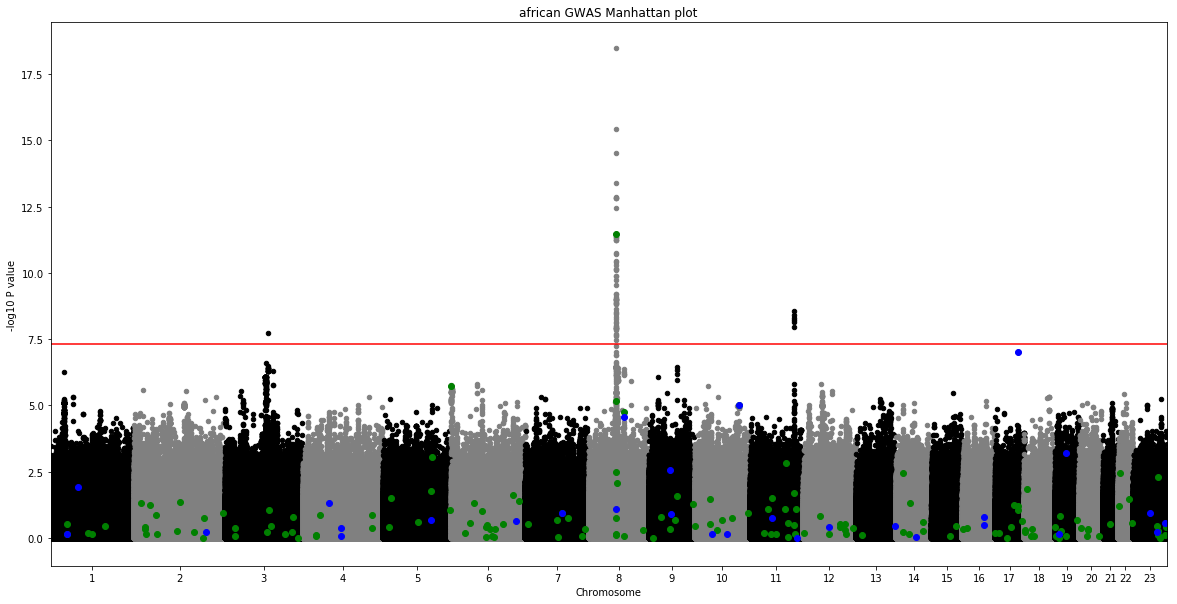

In [10]:
plot_manhattan_annotate(df,"african",["black","gray"],["/cellar/users/mpagadal/collaborations/kader/prostate-cancer-known-snps-list","/cellar/users/mpagadal/collaborations/kader/psa-risk-snps-list"],["green","blue"])

### export GWAS

In [12]:
afr_gwas=pd.read_csv("../data/plink-associations/all/african.cohort.GWAS.ADD",delimiter="\t")
afr_gwas=afr_gwas[afr_gwas["P"]<.00000005]

/cellar/users/mpagadal/Programs/miniconda3/envs/baseold/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
eur_gwas=pd.read_csv("../data/plink-associations/all/european.cohort.GWAS.ADD",delimiter="\t")
eur_gwas=eur_gwas[eur_gwas["P"]<.00000005]

In [14]:
eur_afr_gwas=pd.read_csv("../data/plink-associations/all/european.african.cohort.GWAS.ADD",delimiter="\t")
eur_afr_gwas=eur_afr_gwas[eur_afr_gwas["P"]<.00000005]

In [15]:
afr_gwas.to_csv("../data/supplemental/Supplemental_Table_1.csv",index=None)
eur_gwas.to_csv("../data/supplemental/Supplemental_Table_2.csv",index=None)
eur_afr_gwas.to_csv("../data/supplemental/Supplemental_Table_3.csv",index=None)